# Looking at Raddars Userids

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from tqdm import tqdm
pd.set_option('max_columns', 100)
%matplotlib inline

In [3]:
userids = pd.read_csv('../../data/userids/userids-001.csv')

In [4]:
userids.head()

,TransactionID,userid
0,2987000,1
1,2987001,2
2,2987002,3
3,2987003,4
4,2987004,5


In [5]:
train = pd.read_parquet('../../input/train.parquet')
test = pd.read_parquet('../../input/test.parquet')
tt = pd.concat([train, test], axis=0, sort=False)

In [8]:
tt.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0.0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,None,NaN,None,None,None,None,None,None,None,None
2987001,0.0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,None,NaN,None,None,None,None,None,None,None,None
2987002,0.0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,None,NaN,None,None,None,None,None,None,None,None
2987003,0.0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,None,NaN,None,None,None,None,None,None,None,None
2987004,0.0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [10]:
tt = tt.merge(userids, left_index=True, right_on=['TransactionID'])

In [17]:
tt.groupby('userid').mean()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32,TransactionID
userid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-659047,NaN,3.419780e+07,26.82600,15885.0,545.0,185.0,138.0,NaN,NaN,NaN,NaN,1.00,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.00,1.00,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.708333,0.708333,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.0,213674.333333,NaN,NaN,-1.666667,-9.666667,NaN,NaN,0.0,0.0,97.850001,27.00,NaN,225.0,15.0,316.333333,469.0,NaN,NaN,NaN,NaN,NaN,NaN,4169378.00
-659025,NaN,3.419598e+07,30.95000,2803.0,100.0,150.0,226.0,337.0,87.0,NaN,NaN,2.00,2.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0,0.0,2.0,0.0,10.00,2.00,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4169282.00
-658603,NaN,3.417644e+07,13.83325,2650.0,142.0,185.0,224.0,NaN,NaN,NaN,NaN,1.25,1.0,0.0,1.0,0.0,1.0,1.0,0.5,0.0,0.5,1.0,1.0,0.75,0.75,0.0,NaN,NaN,0.0,0.0,0.0,0.0,252.166672,0.166666,0.0,NaN,0.0,0.0,0.0,182.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17.5,157359.000000,0.0,0.0,0.000000,0.000000,NaN,NaN,0.0,0.0,100.000000,27.75,NaN,225.0,NaN,420.000000,572.5,NaN,NaN,NaN,NaN,NaN,NaN,4169188.75
-658590,NaN,3.416787e+07,65.50000,9112.0,250.0,150.0,226.0,441.0,87.0,NaN,NaN,1.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.00,1.00,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4168774.50
-658563,NaN,3.414278e+07,47.34000,4461.0,375.0,185.0,224.0,NaN,NaN,NaN,NaN,1.00,1.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,1.00,1.00,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0000,0.0000,0.0,0.0,0.0,47.3396,47.3396,47.3396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-20.0,752189.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,100.000000,27.00,NaN,225.0,NaN,427.000000,595.0,NaN,NaN,NaN,NaN,NaN,NaN,4168301.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659792,NaN,3.421428e+07,94.67900,13832.0,375.0,185.0,224.0,284.0,60.0,NaN,NaN,1.00,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.00,1.00,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4170235.00
659793,NaN,3.421429e+07,12.17300,3154.0,408.0,185.0,224.0

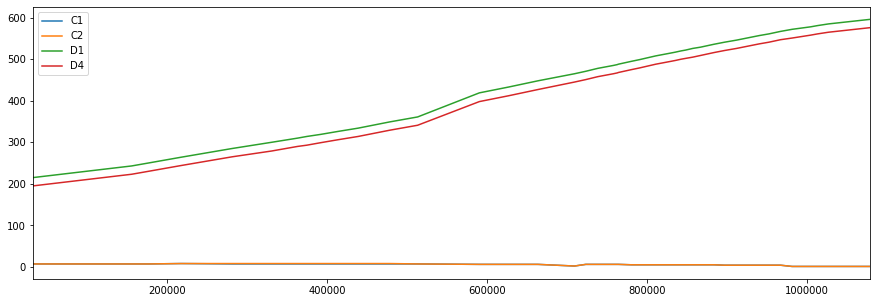

In [25]:
tt.query('userid == -27703').sort_values('TransactionDT')[['C1','C2','D1','D4']].plot(figsize=(15, 5))

In [26]:
tt.userid.unique()

array([     1,      2,      3, ..., 659794, 659795, 659796])

In [45]:
(tt.groupby('userid')['TransactionDT'].count().sort_values() > 2).sum()

72298

In [47]:
len(tt.userid.unique())

672388

In [48]:
72298/672388

0.10752422708317222

In [49]:
(tt.groupby('userid')['TransactionDT'].count().sort_values() > 3).sum()

42829

In [50]:
42829/672388

0.06369685360238433

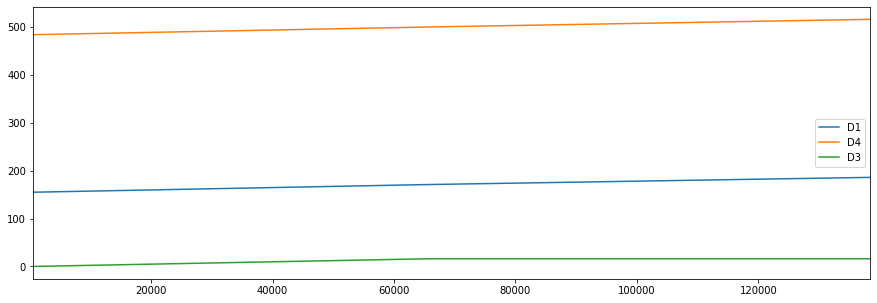

In [35]:
tt.query('userid == 324172').sort_values('TransactionDT')[['D1','D4','D3']].plot(figsize=(15, 5))

In [53]:
tt.query('userid == -27703 or userid == 55027')

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,...,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,TransactionID,userid
32811,0.0,828302,129.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,None,7.0,7.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,6.0,0.0,60.0,7.0,215.0,215.0,11.0,195.0,195.0,NaN,NaN,NaN,NaN,215.0,0.0,NaN,NaN,NaN,206.0,T,T,F,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,3019811,-27703
67405,0.0,1533171,139.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,NaN,NaN,gmail.com,None,7.0,7.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,6.0,0.0,62.0,7.0,223.0,223.0,8.0,203.0,8.0,NaN,NaN,NaN,NaN,223.0,NaN,NaN,NaN,NaN,214.0,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,3054405,55027
102485,0.0,2056439,67.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,NaN,NaN,gmail.com,None,7.0,7.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,6.0,0.0,66.0,7.0,229.0,229.0,6.0,209.0,6.0,NaN,NaN,NaN,NaN,229.0,NaN,NaN,NaN,NaN,220.0,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,3089485,55027
156006,0.0,3253046,35.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,None,7.0,7.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,6.0,0.0,70.0,7.0,243.0,243.0,14.0,223.0,14.0,NaN,NaN,NaN,NaN,243.0,28.0,NaN,NaN,NaN,234.0,T,T,F,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,3143006,-27703
176704,0.0,3852958,77.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,None,7.0,7.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,6.0,0.0,73.0,7.0,250.0,250.0,7.0,230.0,7.0,NaN,NaN,NaN,NaN,250.0,35.0,NaN,NaN,NaN,241.0,T,T,F,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,3163704,-27703
197107,0.0,4460411,55.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,NaN,NaN,gmail.com,None,7.0,7.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,6.0,0.0,75.0,7.0,257.0,257.0,7.0,237.0,7.0,NaN,NaN,NaN,NaN,257.0,NaN,NaN,NaN,NaN,248.0,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,3184107,55027
217767,0.0,5085503,119.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,None,8.0,8.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,6.0,0.0,83.0,8.0,264.0,264.0,7.0,244.0,7.0,NaN,NaN,NaN,NaN,264.0,49.0,NaN,NaN,NaN,255.0,T,T,F,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,3204767,-27703
261332,0.0,6286843,35.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,NaN,NaN,gmail.com,None,7.0,8.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0

In [55]:
m = 1/86400 # Slope
x1 = 86400 # The leftmost x-point
for d in range(1, 15):
    tt[f'D{d}_intercept'] = tt[f'D{d}'] + m * (x1 - tt['TransactionDT'])
    tt[f'D{d}_intercept'] = tt[f'D{d}_intercept'] #.round(2)

In [67]:
current_dt = 18403224
current_d3 = 27
current_d1_intercept = 206.9997
min_d1_intercept = current_d1_intercept - 1
max_d1_intercept = current_d1_intercept + 1

visa = 'visa'
debit = 'debit'


tt.query("""D1_intercept<=@max_d1_intercept & \
    D1_intercept>=@min_d1_intercept & card1==10409 &x card2==111 & card3==150 & card4==@visa & card5==226 & card6==@debit""").sort_values('TransactionDT')

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,...,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,TransactionID,userid,D1_intercept,D2_intercept,D3_intercept,D4_intercept,D5_intercept,D6_intercept,D7_intercept,D8_intercept,D9_intercept,D10_intercept,D11_intercept,D12_intercept,D13_intercept,D14_intercept
32811,0.0,828302,129.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,None,7.0,7.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,6.0,0.0,60.0,7.0,215.0,215.0,11.0,195.0,195.0,NaN,NaN,NaN,NaN,215.0,0.0,NaN,NaN,NaN,206.0,T,T,F,None,None,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,3019811,-27703,206.413171,206.413171,2.413171,186.413171,186.413171,NaN,NaN,NaN,NaN,206.413171,-8.586829,NaN,NaN,NaN
67405,0.0,1533171,139.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,NaN,NaN,gmail.com,None,7.0,7.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,6.0,0.0,62.0,7.0,223.0,223.0,8.0,203.0,8.0,NaN,NaN,NaN,NaN,223.0,NaN,NaN,NaN,NaN,214.0,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,3054405,55027,206.254965,206.254965,-8.745035,186.254965,-8.745035,NaN,NaN,NaN,NaN,206.254965,NaN,NaN,NaN,NaN
102485,0.0,2056439,67.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,NaN,NaN,gmail.com,None,7.0,7.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,6.0,0.0,66.0,7.0,229.0,229.0,6.0,209.0,6.0,NaN,NaN,NaN,NaN,229.0,NaN,NaN,NaN,NaN,220.0,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,3089485,55027,206.198623,206.198623,-16.801377,186.198623,-16.801377,NaN,NaN,NaN,NaN,206.198623,NaN,NaN,NaN,NaN
156006,0.0,3253046,35.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,None,7.0,7.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,6.0,0.0,70.0,7.0,243.0,243.0,14.0,223.0,14.0,NaN,NaN,NaN,NaN,243.0,28.0,NaN,NaN,NaN,234.0,T,T,F,None,None,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,3143006,-27703,206.349005,206.349005,-22.650995,186.349005,-22.650995,NaN,NaN,NaN,NaN,206.349005,-8.650995,NaN,NaN,NaN
176704,0.0,3852958,77.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,None,7.0,7.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,6.0,0.0,73.0,7.0,250.0,250.0,7.0,230.0,7.0,NaN,NaN,NaN,NaN,250.0,35.0,NaN,NaN,NaN,241.0,T,T,F,None,None,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,3163704,-27703,206.405579,206.405579,-36.594421,186.405579,-36.594421,NaN,NaN,NaN,NaN,206.405579,-8.594421,NaN,NaN,NaN
197107,0.0,4460411,55.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,NaN,NaN,gmail.com,None,7.0,7.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,6.0,0.0,75.0,7.0,257.0,257.0,7.0,237.0,7.0,NaN,NaN,NaN,NaN,257.0,NaN,NaN,NaN,NaN,248.0,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,3184107,55027,206.374873,206.374873,-43.625127,186.374873,-43.625127,NaN,NaN,NaN,NaN,206.374873,NaN,NaN,NaN,NaN
217767,0.0,5085503,119.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,None,8.0,8.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,6.0,0.0,83.0,8.0,264.0,264.0,7.0,244.0,7.0,NaN,NaN,NaN,NaN,264.0,49.0,NaN,NaN,NaN,255.0,T,

In [68]:
tt['the_guy'] = False
tt.loc[(tt['C14'] >= 650) & 
       (tt['TransactionDT'] > 5000000) & 
       (tt['TransactionDT'] < 18000000), 'the_guy'] = True

In [70]:
tt.query('the_guy == True')

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,...,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,TransactionID,userid,D1_intercept,D2_intercept,D3_intercept,D4_intercept,D5_intercept,D6_intercept,D7_intercept,D8_intercept,D9_intercept,D10_intercept,D11_intercept,D12_intercept,D13_intercept,D14_intercept,the_guy
347507,0.0,8556047,200.0,R,7861,494.0,150.0,visa,226.0,credit,343.0,87.0,NaN,NaN,anonymous.com,outlook.com,1235.0,1350.0,0.0,905.0,0.0,921.0,0.0,486.0,0.0,441.0,971.0,0.0,709.0,661.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1184.000000,0.000000,NaN,NaN,NaN,797.0,NaN,NaN,None,None,None,None,None,...,NaN,0.0,0.0,100.000000,NotFound,52.0,NaN,Found,Found,166.0,13.0,216.0,214.0,NaN,NaN,None,NaN,NaN,NaN,None,Found,Found,None,ie 11.0 for desktop,NaN,None,None,F,F,T,F,desktop,rv:11.0,3334507,238188,-97.028322,NaN,NaN,NaN,NaN,NaN,NaN,1085.971678,-98.028322,NaN,NaN,NaN,698.971678,NaN,True
349270,0.0,8619133,100.0,R,12116,404.0,150.0,mastercard,102.0,credit,204.0,87.0,NaN,NaN,comcast.net,comcast.net,1234.0,1351.0,0.0,905.0,0.0,922.0,0.0,484.0,0.0,439.0,972.0,0.0,708.0,661.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,772.750000,0.750000,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,...,NaN,0.0,0.0,100.000000,NotFound,52.0,NaN,Found,Found,166.0,13.0,216.0,214.0,NaN,NaN,None,NaN,NaN,NaN,None,Found,Found,None,ie 11.0 for desktop,NaN,None,None,F,F,T,T,desktop,rv:11.0,3336270,240925,-98.758484,NaN,NaN,NaN,NaN,NaN,NaN,673.991516,-98.008484,NaN,NaN,NaN,NaN,NaN,True
349881,1.0,8628330,450.0,R,3278,453.0,150.0,visa,226.0,debit,177.0,87.0,NaN,NaN,gmail.com,gmail.com,1236.0,1353.0,0.0,906.0,0.0,923.0,0.0,486.0,0.0,440.0,974.0,0.0,708.0,661.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,...,-30.0,NaN,NaN,100.000000,NotFound,33.0,-300.0,New,NotFound,166.0,12.0,317.0,597.0,252.0,14.0,IP_PROXY:TRANSPARENT,15.0,321.0,100.0,Found,New,NotFound,iOS 11.2.6,mobile safari generic,32.0,2208x1242,None,T,F,F,F,mobile,iOS Device,3336881,241270,-98.864931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
349911,1.0,8628737,450.0,R,12581,453.0,150.0,visa,226.0,debit,122.0,87.0,NaN,NaN,gmail.com,gmail.com,1237.0,1354.0,0.0,906.0,0.0,923.0,0.0,487.0,0.0,441.0,974.0,0.0,708.0,661.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,...,NaN,NaN,NaN,100.000000,NotFound,33.0,-300.0,New,NotFound,166.0,NaN,529.0,161.0,NaN,NaN,None,NaN,NaN,NaN,None,New,NotFound,iOS 11.2.6,mobile safari generic,32.0,2208x1242,match_status:1,T,F,F,F,mobile,iOS Device,3336911,241286,-98.869641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
350118,0.0,8631472,150.0,R,17409,360.0,150.0,visa,166.0,debit,299.0,87.0,NaN,NaN,me.com,me.com,1239.0,1356.0,0.0,908.0,0.0,925.0,0.0,488.0,0.0,442.0,976.0,0.0,708.0,661.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,21.875000,0.875000,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,...,NaN,0.0,0.0,95.160004,NotFound,63.0,NaN,Unknown,None,166.0,13.0,216.0,214.0,NaN,NaN,None,NaN,NaN,NaN,None,Found,Found,None,ie 11.0 for desktop,NaN,None,None,F,F,F,T,desktop,rv:11.0,3337118,241408,-98.901296,NaN,NaN,NaN,NaN,NaN,NaN,-77.026296,-98.026296,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586853,0.0,15706564,200.0,R,18268,583.0,150.0,visa,226.0,credit,299.0,87.0,NaN,NaN,yahoo.

In [73]:
tt.query('C10 > 0 or C3 > 0 or C4 > 0 or C7 > 0 or C8 > 0')

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,...,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,TransactionID,userid,D1_intercept,D2_intercept,D3_intercept,D4_intercept,D5_intercept,D6_intercept,D7_intercept,D8_intercept,D9_intercept,D10_intercept,D11_intercept,D12_intercept,D13_intercept,D14_intercept,the_guy
4,0.0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,None,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,...,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,None,NaN,NaN,NaN,None,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,2987004,5,-0.001227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8,0.0,86535,15.000,H,2803,100.0,150.0,visa,226.0,debit,337.0,87.0,NaN,NaN,anonymous.com,None,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,...,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,None,NaN,NaN,NaN,None,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device,2987008,9,-0.001562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
10,0.0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,credit,NaN,NaN,NaN,NaN,gmail.com,gmail.com,1.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,83.000000,0.000000,0.0,NaN,0.0,0.0,0.0,0.0,None,None,None,M0,None,...,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,None,NaN,NaN,NaN,None,Found,Found,None,chrome 62.0,NaN,None,None,F,F,T,T,desktop,Windows,2987010,11,0.998275,0.998275,-0.001725,-0.001725,-0.001725,-0.001725,-0.001725,82.998275,-0.001725,-0.001725,NaN,-0.001725,-0.001725,-0.001725,False
11,0.0,86555,16.495,C,4461,375.0,185.0,mastercard,224.0,debit,NaN,NaN,NaN,30.0,hotmail.com,hotmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,None,None,None,M0,None,...,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,None,NaN,NaN,NaN,None,New,NotFound,None,chrome 62.0,NaN,None,None,F,F,T,T,desktop,None,2987011,12,-0.001794,NaN,NaN,-0.001794,NaN,-0.001794,NaN,NaN,NaN,-0.001794,NaN,-0.001794,-0.001794,-0.001794,False
16,0.0,86620,30.000,H,1790,555.0,150.0,visa,226.0,debit,170.0,87.0,NaN,NaN,aol.com,None,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,...,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,None,NaN,NaN,NaN,None,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS,2987016,17,-0.002546,NaN,NaN,NaN,NaN,NaN,NaN,25.997454,-0.002546,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097224,NaN,34214271,13.403,C,3154,408.0,185.0,mastercard,224.0,debit,NaN,NaN,NaN,7.0,hotmail.com,hotmail.com,1.0,2.0,0.0,2.0,0.0,2.0,2.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,373.0,373.0,1.0,0.0,NaN,0.0,NaN,373.958344,0.958333,0.0,NaN,0.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from tqdm import tqdm
pd.set_option('max_columns', 100)
%matplotlib inline

train = pd.read_parquet('../../input/train.parquet')
test = pd.read_parquet('../../input/test.parquet')
tt = pd.concat([train, test], axis=0, sort=False)
userids = pd.read_csv('../../data/userids/userids-001.csv')
tt = tt.merge(userids, left_index=True, right_on=['TransactionID'])

m = 1/86400 # Slope
x1 = 86400 # The leftmost x-point
for d in range(1, 15):
    tt[f'D{d}_intercept'] = tt[f'D{d}'] + m * (x1 - tt['TransactionDT'])
    tt[f'D{d}_intercept'] = tt[f'D{d}_intercept'] #.round(2)

tt['corey_userid'] = np.nan
tt['ive_been_mapped'] = False
tt2 = tt[['corey_userid','ive_been_mapped','D1_intercept',
          'card1','card2','card3','card4','card5','card6']].copy()


for i in tqdm(range(len(tt2))):
    if tt2.iloc[i]['ive_been_mapped']==False:
        current_d1_intercept = tt2.iloc[i]['D1_intercept']
        current_card1 = tt2.iloc[i]['card1']
        current_card2 = tt2.iloc[i]['card2']
        current_card3 = tt2.iloc[i]['card3']
        current_card4 = tt2.iloc[i]['card4']
        current_card5 = tt2.iloc[i]['card5']
        current_card6 = tt2.iloc[i]['card6']
        
        tt2.loc[tt2.eval('D1_intercept>=@current_d1_intercept-1 & D1_intercept<=@current_d1_intercept+1 & card1==@current_card1 & card2==@current_card2 & card3==@current_card3 & card4==@current_card4 & card5==@current_card5 & card6==@current_card6'), 'corey_userid'] = i
        tt2.loc[tt2.eval('D1_intercept>=@current_d1_intercept-1 & D1_intercept<=@current_d1_intercept+1 & card1==@current_card1 & card2==@current_card2 & card3==@current_card3 & card4==@current_card4 & card5==@current_card5 & card6==@current_card6'), 'ive_been_mapped'] = True

  0%|          | 630/1097231 [02:30<89:01:48,  3.42it/s] 

KeyboardInterrupt: 

In [9]:
print(train[train['V95'] == train['V98'] + train['V101'] + train['V104']].shape[0]/train.shape[0])
print(train[train['V306']==train['V309']+train['V316']+train['V319']].shape[0]/train.shape[0])
print(train[train['V307']==train['V310']+train['V317']+train['V320']].shape[0]/train.shape[0])
print(train[train['V308']==train['V312']+train['V318']+train['V321']].shape[0]/train.shape[0])

0.9983388085481085
0.9919615944728554
0.9702645036746029
0.985460764723812


In [8]:
full = tt
for i in tqdm(range(len(full))):
    if not full[i,9]: # If ive_been_mapped==False...
        current_d1_intercept = full[i,7]
        current_card1 = full[i,1]
        current_card2 = full[i,2]
        current_card3 = full[i,3]
        current_card4 = full[i,4]
        current_card5 = full[i,5]
        current_card6 = full[i,6]
        
        where_condition = np.where((full[:,7]>=current_d1_intercept-1) & (full[:,7]<=current_d1_intercept+1) & (full[:,1]==current_card1) & (full[:,2]==current_card2) & (full[:,3]==current_card3) & (full[:,4]==current_card4) & (full[:,5]==current_card5) & (full[:,6]==current_card6))
        
        full[where_condition,8] = i # userid
        full[where_condition,8] = True # You've been mapped


  0%|          | 0/1097231 [00:00<?, ?it/s]

KeyError: (0, 9)